In [1]:
from sympy import *

In [2]:
init_printing()

In [3]:
expr = 3 + sqrt(3)

In [4]:
expr

In [5]:
x, y = symbols("x y")

In [6]:
expr = x + y
expr

In [7]:
Rational(1/2) + Rational(1/5)

In [8]:
expr = Rational(1/3)
N(expr, 100)

In [9]:
expr = x**2 + 2*x + 1
expr

In [10]:
expr.subs(x, 2)

In [11]:
expr = (2 * x + Rational(1, 3)*x + 4) / x
expr

In [12]:
simplify(expr)

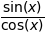

In [13]:
expr = sin(x)/cos(x)
expr

In [14]:
simplify(expr)

In [15]:
diff(sin(x),x)

In [16]:
integrate(sin(x),x)

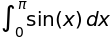

In [17]:
Integral(sin(x),(x, 0, pi))

In [18]:
expr = Sum(1/(x**2 + 2*x), (x, 1, 10))

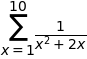

In [19]:
expr

In [20]:
expr.doit()

In [21]:
expr_1 = 2 * x + y
expr_2 = 2 * y - x - 5
solve([expr_1, expr_2], (x,y))

In [22]:
def sympy_expr(val_x):
    expr = x**2 + sqrt(3)*x - Rational(1,3)
    return expr.subs(x, val_x)


In [23]:
sympy_expr(3)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
list1 = np.arange(1, 1000)
list2 = pd.Series(list1)

In [26]:
%timeit [sympy_expr(item) for item in list1]
%timeit [sympy_expr(item) for item in list2]

391 ms ± 31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
349 ms ± 26.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%timeit np.vectorize(sympy_expr)(list1)
%timeit list2.apply(sympy_expr)

337 ms ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
342 ms ± 35.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Lambdify
http://docs.sympy.org/latest/modules/utilities/lambdify.html

In [28]:
expr = x**2 + sqrt(3)*x - Rational(1,3)
lf = lambdify(x, expr)

In [29]:
%timeit lf(list1)
%timeit lf(list2)

17.3 µs ± 346 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
362 µs ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


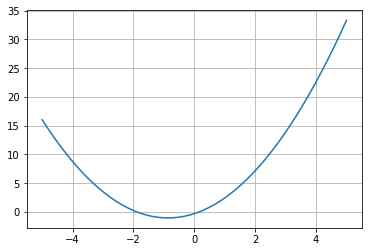

In [30]:
fig = plt.figure()
axes = fig.add_subplot(111)
x_vals = np.linspace(-5., 5.)
y_vals = lf(x_vals)
axes.grid()
axes.plot(x_vals, y_vals)
plt.show()

## Matice

In [31]:
r, theta = symbols("r theta")
g  = Matrix([[r**2,0],[0,r**2*sin(theta)**2]])

In [32]:
g

⎡ 2            ⎤
⎢r       0     ⎥
⎢              ⎥
⎢     2    2   ⎥
⎣0   r ⋅sin (θ)⎦

In [33]:
g.inv()

⎡1             ⎤
⎢──      0     ⎥
⎢ 2            ⎥
⎢r             ⎥
⎢              ⎥
⎢        1     ⎥
⎢0   ──────────⎥
⎢     2    2   ⎥
⎣    r ⋅sin (θ)⎦

In [34]:
g + g.inv()

⎡ 2   1                          ⎤
⎢r  + ──             0           ⎥
⎢      2                         ⎥
⎢     r                          ⎥
⎢                                ⎥
⎢          2    2          1     ⎥
⎢   0     r ⋅sin (θ) + ──────────⎥
⎢                       2    2   ⎥
⎣                      r ⋅sin (θ)⎦

In [35]:
A = Matrix([[1,x], [y,1]])

In [36]:
A

⎡1  x⎤
⎢    ⎥
⎣y  1⎦

In [37]:
A**2

⎡x⋅y + 1    2⋅x  ⎤
⎢                ⎥
⎣  2⋅y    x⋅y + 1⎦

In [38]:
f, g = symbols('f g', cls=Function)

In [39]:
f(x)

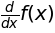

In [40]:
f(x).diff(x)

In [41]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))

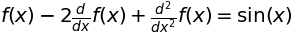

In [42]:
diffeq

In [43]:
dsolve(diffeq, f(x))